<a href="https://colab.research.google.com/github/ronakbihani123/supervised_ml_algorithms/blob/main/gradient_descent_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df  =df.drop(columns = ["PassengerId" , "Name" , "Ticket" , "Cabin"])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()


In [ ]:
df[["Sex" , "Embarked"]] = oe.fit_transform(df[["Sex" , "Embarked"]])

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,34.5,0,0,7.8292,1.0
1,1,3,0.0,47.0,1,0,7.0000,2.0


In [ ]:
x = df.drop(columns = ["Survived"])
y = df["Survived"]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
adaboost = AdaBoostClassifier(n_estimators = 100 , random_state=42)
adaboost.fit(x_train , y_train)
y_pred_adaboost = adaboost.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_adaboost)

1.0

In [ ]:
# gradient descent optimization technique --- >

In [ ]:
# loss function ----> actual value - predicted value
# optimization ----> reduce the loss function

In [ ]:
# let suppose ---> if we have equation of simple line
# y = mx+b   ------(1)         (x, y ) ---> coordinates , m = slope(weights) , b = intercept         intercept ka kaam hota h agr kisi bhi condition me m ya
# x me se koi zero ho gya to to puri line ki equation ko zero kr dega isliye intercept ek esa minimum point hota h jo line ki equation ko zero nhi hone deta

# now let suppose , prediction line is :
# y_pred = mx+b -----(2)

# now , we will calculate the loss function with respect to mean squared error
# Loss function = 1/n * (y-y_pred)**2
# n = n(features) = 1
# L = (y-y_pred)**2
# L = (y-(mx+b))**2        -----(3)

# now we will calculate differentiation w.r.t intercept (b)   :           why need to find differentiation  ? --- kisi bhi element ki current / exact location nikalni ho to
# uske liye hme differentaion krna hota h

# dL/db = 2*(y-mx-b)[dy / db - dmx /db - db/db]

# dl / db = 2*(y- mx- b )[0-0-1]

# dl/db = -2(y-mx-b)     ----(4)

# now we will calculate differentiation w.r.t weights(m):

# dl/dm = 2*(y-mx-b)[dy/dm-dmx/dm - db / dm]

# dl / dm  = 2*(y-mx-b) [0-x-0]

# dl / dm = -2(y-mx-b)(x)        ----(5)


# now ,  equation of new line
# in general learning rate = 0.001
# b_new = b_old - learning rate * dl/db
# m_new = m_old - learning rate * dl/dm

In [ ]:
# b_old = 50 , dl/db = 100  = b_new = 50- 0.001*100 = 50-0.1 = 49.9

In [ ]:
# lr >>>>>0 gradient exploading
# lr <<<<<<<0 vanishing dradient

0.1

In [ ]:
# so , our final line of equation will be :
# y_new = m_new * X + b_new      .......(6)

# Equation(6) denotes as final line of equation.

In [ ]:
df = pd.read_csv("/content/credit_scoring.csv")
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Employment Status,0
Credit Utilization Ratio,0
Payment History,0
Number of Credit Accounts,0
Loan Amount,0
Interest Rate,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [ ]:
df.select_dtypes(include = "object")

,Gender,Marital Status,Education Level,Employment Status,Type of Loan
0,Male,Married,Master,Employed,Personal Loan
1,Male,Married,High School,Unemployed,Auto Loan
2,Female,Single,Master,Employed,Auto Loan
3,Female,Married,PhD,Unemployed,Auto Loan
4,Male,Married,Bachelor,Self-Employed,Personal Loan
...,...,...,...,...,...
995,Male,Divorced,High School,Employed,Auto Loan
996,Male,Divorced,Bachelor,Unemployed,Home Loan
997,Female,Single,Master,Self-Employed,Personal Loan
998,Female,Married,PhD,Self-Employed,Auto Loan


In [ ]:
for i in df.select_dtypes(include = "object"):
  df[[i]] = oe.fit_transform(df[[i]])

In [ ]:
df.head(2)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,1.0,1.0,2.0,0.0,0.22,2685.0,2,4675000,2.65,48,2.0
1,25,1.0,1.0,1.0,2.0,0.20,2371.0,9,3619000,5.19,60,0.0


In [ ]:
x = df.drop(columns = ["Type of Loan"])
y = df["Type of Loan"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators = 100 , random_state = 42)

In [ ]:
adaboost.fit(x_train , y_train )
y_pred_adaboost = adaboost.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_adaboost = accuracy_score(y_test , y_pred_adaboost)
print("accuracy of adaboost:" ,  accuracy_adaboost)

accuracy of adaboost: 0.335


In [ ]:
xgboost = XGBClassifier(n_estimators = 100 , random_state = 42)
xgboost.fit(x_train , y_train)
y_pred_xgboost = xgboost.predict(x_test)
accuracy_xgboost = accuracy_score(y_test , y_pred_xgboost)
print("accuracy of xgboost:" ,  accuracy_xgboost)

accuracy of xgboost: 0.315


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators = 100 , random_state = 42)
gb_classifier.fit(x_train , y_train)
y_pred_gb = gb_classifier.predict(x_test)
accuracy_gb = accuracy_score(y_test , y_pred_gb)
print("accuracy of gb:" ,  accuracy_gb)

accuracy of gb: 0.335


In [ ]:
lgb_classifier = LGBMClassifier(n_estimators=100 , random_state=42)
lgb_classifier.fit(x_train , y_train)
y_pred_lgb = lgb_classifier.predict(x_test)
accuracy_lgb = accuracy_score(y_test , y_pred_lgb)
print("accuracy of lightgbm classifier:" , accuracy_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score -1.089900
[LightGBM] [Info] Start training from score -1.104882
[LightGBM] [Info] Start training from score -1.101115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
cat_classifier = CatBoostClassifier(n_estimators= 100 , random_state=42)
cat_classifier.fit(x_train , y_train)
y_pred_cat = cat_classifier.predict(x_test)
accuracy_cat = accuracy_score(y_test , y_pred_cat)
print("accuracy of catboost classifier:" , accuracy_cat)

Learning rate set to 0.5
0:	learn: 1.0614137	total: 49.2ms	remaining: 4.87s
1:	learn: 1.0329311	total: 50.8ms	remaining: 2.49s
2:	learn: 1.0054102	total: 52.4ms	remaining: 1.7s
3:	learn: 0.9764791	total: 54ms	remaining: 1.29s
4:	learn: 0.9495328	total: 55.6ms	remaining: 1.06s
5:	learn: 0.9358777	total: 57.2ms	remaining: 896ms
6:	learn: 0.9178748	total: 58.7ms	remaining: 780ms
7:	learn: 0.9083321	total: 60.3ms	remaining: 693ms
8:	learn: 0.8897527	total: 61.8ms	remaining: 625ms
9:	learn: 0.8817231	total: 63.3ms	remaining: 570ms
10:	learn: 0.8661265	total: 64.9ms	remaining: 525ms
11:	learn: 0.8441491	total: 66.4ms	remaining: 487ms
12:	learn: 0.8266681	total: 67.9ms	remaining: 454ms
13:	learn: 0.8078583	total: 69.5ms	remaining: 427ms
14:	learn: 0.7924273	total: 71.1ms	remaining: 403ms
15:	learn: 0.7794960	total: 72.6ms	remaining: 381ms
16:	learn: 0.7668033	total: 75.5ms	remaining: 369ms
17:	learn: 0.7501509	total: 77.1ms	remaining: 351ms
18:	learn: 0.7367199	total: 78.8ms	remaining: 336ms


In [ ]:
stoch_gb_classifier = HistGradientBoostingClassifier(random_state=42)
stoch_gb_classifier.fit(x_train , y_train)
y_pred_stoch_gb = stoch_gb_classifier.predict(x_test)
accuracy_stoch_gb = accuracy_score(y_test , y_pred_stoch_gb)
print("accuracy of stochastic gradient boosting classifier:" , accuracy_stoch_gb)

accuracy of stochastic gradient boosting classifier: 0.275


In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
x , y = make_regression(n_samples=4 , n_features=1 ,
                        n_informative=1,
                        n_targets=1,noise = 80,
                        random_state=13)

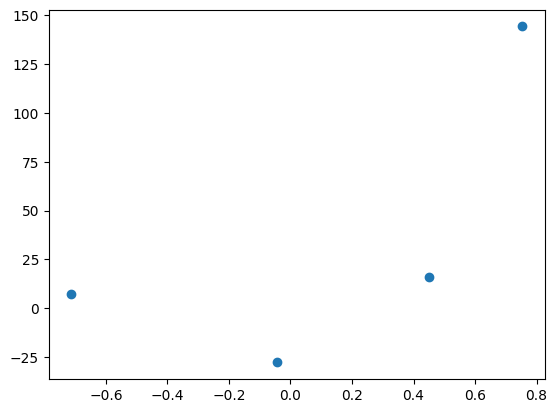

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [ ]:
# lets apply OLS
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True ,
                 fit_intercept=True , n_jobs=None )

LinearRegression()

In [ ]:
reg.coef_    # m slope

array([78.35063668])

In [ ]:
reg.intercept_       #b

np.float64(26.15963284313262)

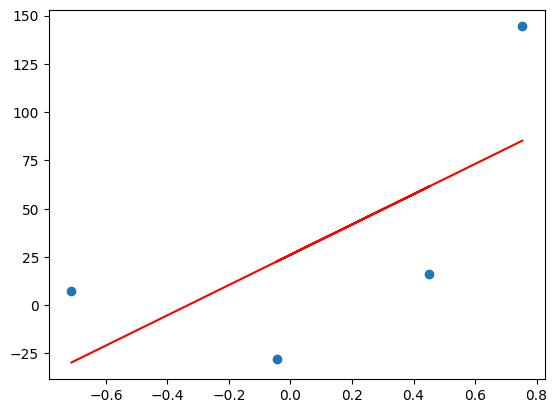

In [ ]:
plt.scatter(x , y)
plt.plot(x, reg.predict(x) , color = "red")

In [ ]:
# lets apply gradient assuming slope is
# constant = 78.35
# and lets assume the starting value for intercept b = 0
y_pred = ((78.35*x)+0).reshape(4)    #y = m*x+b


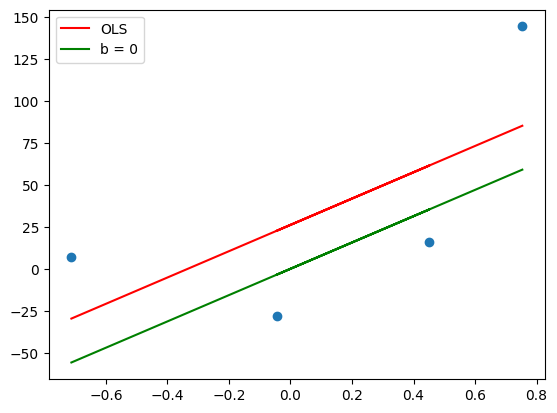

In [ ]:
plt.scatter(x , y)
plt.plot(x , reg.predict(x) , color = "red" , label = "OLS")
plt.plot(x , y_pred , color = "green" , label = "b = 0")
plt.legend()
plt.show()

In [ ]:
m = 78.35
b = 0
loss_shape = 2*np.sum(y-m*x.ravel()-b)           ###dl/db
loss_shape

np.float64(209.27763408209216)

In [ ]:
# lets take learning rate = 0.1
lr = 0.1
step_size = loss_shape*lr
step_size

np.float64(20.927763408209216)

In [ ]:
# calculating the new intercept
b = b-step_size  ## b_new  = b_old - learning_Rate * dl/db
b

np.float64(-20.927763408209216)

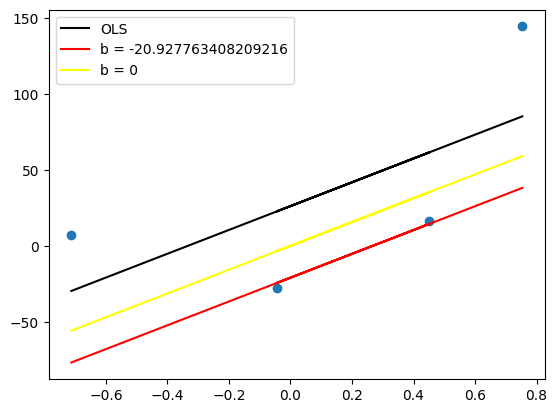

In [ ]:
y_pred1 = ((78.35*x)+b ).reshape(4)

plt.scatter(x , y)
plt.plot(x , reg.predict(x) , color = "black" , label = "OLS")
plt.plot(x , y_pred1 , color = "red" , label = "b = {}".format(b))
plt.plot(x , y_pred , color = "yellow" , label = "b = 0")
plt.legend()
plt.show()

In [ ]:
# iteration - 2
loss_slope1 = -2*np.sum(y-m*x.ravel()-b)
loss_slope1

np.float64(-376.6997413477659)

In [ ]:
step_size = loss_slope1*lr
step_size

np.float64(-37.66997413477659)

In [ ]:
b = b-step_size

In [ ]:
b

np.float64(-58.597737542985804)

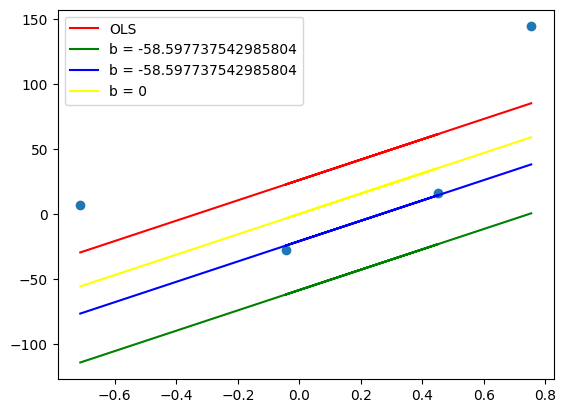

In [ ]:
y_pred2 = ((78.35*x)+b).reshape(4)

plt.scatter(x, y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred2, color='green', label='b = {}'.format(b))
plt.plot(x, y_pred1, color='blue', label='b = {}'.format(b))
plt.plot(x, y_pred, color='yellow', label='b = 0')
plt.legend()
plt.show()


In [ ]:
# iteration - 3
loss_slope1 = -2*np.sum(y-m*x.ravel()-b)
loss_slope1

np.float64(-678.0595344259787)

In [ ]:
step_size = loss_slope1*lr
step_size

np.float64(-67.80595344259787)

In [ ]:
b = b -step_size
b

np.float64(9.208215899612064)

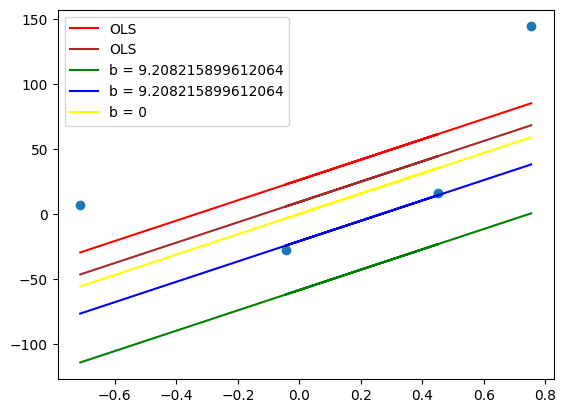

In [ ]:
y_pred3 = ((78.35*x)+b).reshape(4)

plt.scatter(x, y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred3, color='brown', label='OLS')
plt.plot(x, y_pred2, color='green', label='b = {}'.format(b))
plt.plot(x, y_pred1, color='blue', label='b = {}'.format(b))
plt.plot(x, y_pred, color='yellow', label='b = 0')
plt.legend()
plt.show()


In [ ]:
# if i have b = 100 randomly

In [ ]:
# lts apply gradient descent assuming slope is constant = 78.35
# and lets assume the starting value for intercept b = 100
y_pred = ((78.35*x)+100).reshape(4)

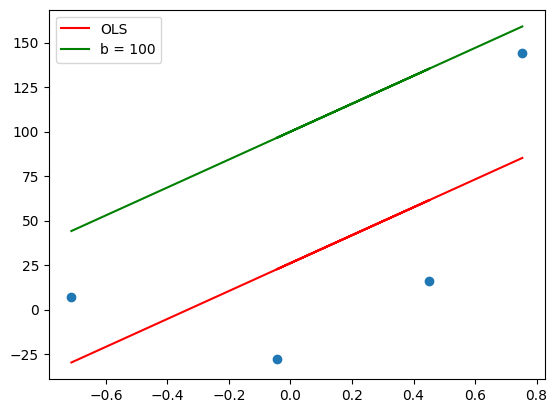

In [ ]:
plt.scatter(x , y)
plt.plot(x , reg.predict(x) , color = "red" , label = "OLS")
plt.plot(x , y_pred , color = "green" , label = "b = 100")
plt.legend()
plt.show()

In [ ]:
m = 78.35
b = 100
loss_slope = -2*np.sum(y-m*x.ravel()-b)
loss_slope

np.float64(590.7223659179078)

In [ ]:
# lets take learning rate = 0.1
lr = 0.1
step_size = loss_slope*lr
step_size

np.float64(59.072236591790784)

In [ ]:
# calculating the new intercept
b = b-step_size
b

np.float64(40.927763408209216)

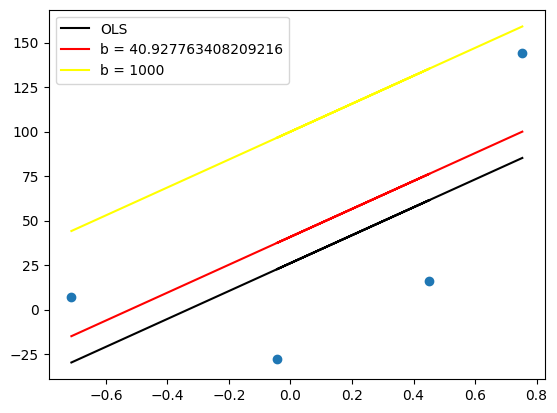

In [ ]:
y_pred1 = ((78.35*x)+b).reshape(4)
plt.scatter(x , y)
plt.plot(x , reg.predict(x) , color = "black" , label = "OLS")
plt.plot(x , y_pred1 , color = "red" , label = "b = {}".format(b))
plt.plot(x , y_pred , color = "yellow" , label = "b = 1000")
plt.legend()
plt.show()

In [ ]:
# iteration - 2
loss_slope = -2*np.sum(y-m*x.ravel()-b)
loss_slope

np.float64(118.14447318358157)

In [ ]:
step_size = loss_slope*lr

In [ ]:
step_size

np.float64(11.814447318358157)

In [ ]:
b = b-step_size
b

np.float64(29.11331608985106)

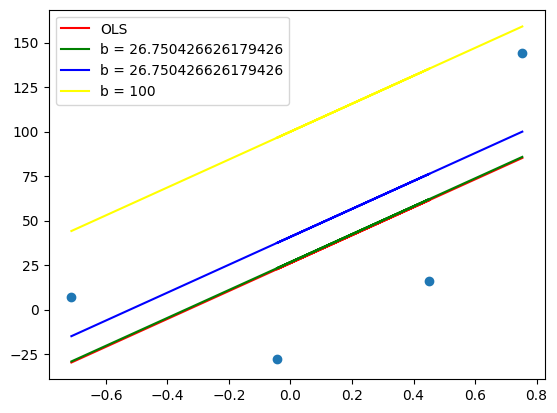

In [ ]:
y_pred2 = ((78.35*x)+b).reshape(4)

plt.scatter(x , y)
plt.plot(x , reg.predict(x) , color = "red" , label = "OLS")
plt.plot(x , y_pred2 , color = "green" , label = "b = {}".format(b))
plt.plot(x , y_pred1 , color = "blue" , label = "b = {}".format(b))
plt.plot(x , y_pred , color = "yellow" , label = "b = 100")
plt.legend()
plt.show()

In [ ]:
# iteratiom - 3
loss_slope = -2*np.sum(y - m*x.ravel()-b)
loss_slope

np.float64(4.725778927343242)

In [ ]:
step_size = loss_slope * lr
step_size

np.float64(2.362889463671634)

In [ ]:
b = b-step_size
b

np.float64(26.750426626179426)

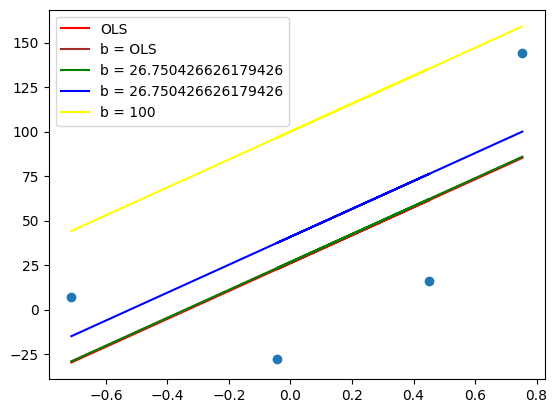

In [ ]:
y_pred3 = ((78.35*x)+b).reshape(4)

plt.scatter(x , y)
plt.plot(x , reg.predict(x) , color = "red" , label = "OLS")
plt.plot(x , y_pred3 , color = "brown" , label = "b = OLS")
plt.plot(x , y_pred2 , color = "green" , label = "b = {}".format(b))
plt.plot(x , y_pred1 , color = "blue" , label = "b = {}".format(b))
plt.plot(x , y_pred , color = "yellow" , label = "b = 100")
plt.legend()
plt.show()